# Convolution 연산
커널 하나 당 Feature Map 한 개가 생성된다.

In [14]:
import numpy as np
import tensorflow as tf

# 입력 이미지의 형태
# (이미지의 개수, height 픽셀수, width 픽셀수, channel)
# (1, 3, 3, 1), 4차원
# 위와 같은 형태를 가지는 넘파이 배열(벡터)을 생성 
image = np.array([[[[1],[2],[3]], 
                    [[4],[5],[6]],
                    [[7],[8],[9]]]], dtype=np.float32) # 뒤에서부터 생성
print(image.shape)
                  
# filter(kernel)의 형태 
# (filter height, filter width, filter channel(=입력 channel), filter의 개수)
# (2,2,1,1), 4차원
weight = np.array([[[[1]], [[1]]],
                   [[[1]], [[1]]]], dtype=np.float32)
print(weight.shape)

# (입력 데이터, 필터, stride(입력 데이터 형태), padding)
# tensor node
conv2d = tf.nn.conv2d(image, 
                      weight, 
                      strides=[1,1,1,1], # stride: 1(가로 1, 세로 1)
                      padding='VALID')   # VALID: 패딩 처리 안함

sess = tf.Session()
result = sess.run(conv2d) # 노드 실행 후 결과 리턴
print('feature map: \n{}'.format(result))

# Convolution 결과
# (이미지의 개수, height, width, feature map channel(=filter 개수))
# (1, 2, 2, 1)
print(result.shape)

(1, 3, 3, 1)
(2, 2, 1, 1)
feature map: 
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


## 컬러 이미지
* 입력 이미지의 채널을 3으로 변환하여 컬러 이미지로 바꿈
* 필터 2개로 설정하자.

In [24]:
import numpy as np
import tensorflow as tf

# 입력 이미지의 형태
# (이미지의 개수, height 픽셀수, width 픽셀수, channel)
# (1, 3, 3, 3), 4차원
# 위와 같은 형태를 가지는 넘파이 배열(벡터)을 생성 
image = np.array([[[[1,2,3],[1,2,3],[1,2,3]], 
                   [[1,2,3],[1,2,3],[1,2,3]],
                   [[1,2,3],[1,2,3],[1,2,3]]]], dtype=np.float32) # 뒤에서부터 생성
print(image.shape)
                  
# filter(kernel)의 형태 
# (filter height, filter width, filter channel(=입력 channel), filter의 개수)
# (2,2,3,2), 4차원
weight = np.array([[[[1,1],[1,1],[1,1]],
                  [[1,1],[1,1],[1,1]]],
                  [[[1,1],[1,1],[1,1]],
                  [[1,1],[1,1],[1,1]]]], dtype=np.float32)
print(weight.shape)

# (입력 데이터, 필터, stride(입력 데이터 형태), padding)
# tensor node
conv2d = tf.nn.conv2d(image, 
                      weight, 
                      strides=[1,1,1,1], # stride: 1(가로 1, 세로 1)
                      padding='VALID')   # VALID: 패딩 처리 안함

sess = tf.Session()
result = sess.run(conv2d) # 노드 실행 후 결과 리턴
print('feature map: \n{}'.format(result))

# Convolution 결과
# (이미지의 개수, height, width, feature map channel(=filter 개수))
# (1, 2, 2, 2)
print(result.shape)

(1, 3, 3, 3)
(2, 2, 3, 2)
feature map: 
[[[[24. 24.]
   [24. 24.]]

  [[24. 24.]
   [24. 24.]]]]
(1, 2, 2, 2)


## 실제 이미지로 구현

<class 'numpy.ndarray'>
(429, 640, 3)


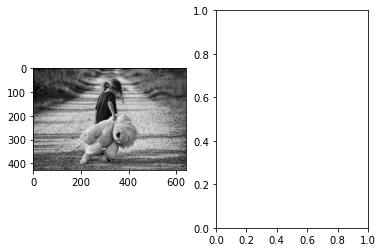

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

figure = plt.figure()
fig_1 = figure.add_subplot(1,2,1) # 원본 이미지
fig_2 = figure.add_subplot(1,2,2) # 결과 이미지

origin_img = img.imread('girl-teddy.jpg')
fig_1.imshow(origin_img)
plt.show()

print(type(origin_img)) # <class 'numpy.ndarray'>
print(origin_img.shape) # (429, 640, 3), 3: RGB 평균

### 입력 이미지

In [43]:
# 4차원 입력 데이터: (1, 429, 640, 3)
# 참고: 넘파이 함수 사용 가능
input_image = origin_img.reshape((1,) + origin_img.shape) # 앞으로 한차원 늘림
print(input_image.shape)

# 픽셀값 실수 형태로 변경 (행렬곱 연산 시 오류 방지)
input_image = input_image.astype(np.float32)

# 흑백 RGB
print(input_image[0,0,0,:]) # [17. 17. 17.]

# 최종 입력 이미지 데이터
# 1채널로 변경 (#6 04:00~07:30)
channel_1_input_image = input_image[:,:,:,0:1] # 4차원, 0: 3차원
print(channel_1_input_image.shape) # (1, 429, 640, 1) -> 필터 개수 1개

(1, 429, 640, 3)
[17. 17. 17.]
(1, 429, 640, 1)


### filter, stride, padding

In [44]:
# filter: (3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print('적용할 필터의 형태: {}'.format(weight.shape))

# strdie: 1
# padding: VALID
conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1], # 1값을 가진 4차원 데이터
                      padding='VALID')

# 수행
sess = tf.Session()
result = sess.run(conv2d)

# Feature Map
# 크기 변함: (429, 640) -> (427, 638)
print('Convolution 결과 형태: {}'.format(result.shape)) # (1, 427, 638, 1)

# 최종 3차원 이미지 데이터
result_image = result[0,:,:,:]
print(result_image.shape) # (427, 638, 1)

적용할 필터의 형태: (3, 3, 1, 1)
Convolution 결과 형태: (1, 427, 638, 1)


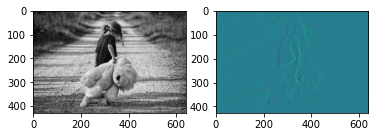

In [49]:
figure = plt.figure()
fig_1 = figure.add_subplot(1,2,1) # 원본 이미지
fig_2 = figure.add_subplot(1,2,2) # 결과 이미지

# 원본 데이터 출력
fig_1.imshow(origin_img)

# 결과 이미지 출력
fig_2.imshow(result_image) # 이미지의 윤곽
plt.show()